In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('cars.csv')

In [25]:
df.head()

,passedemissions,mpg,displacement,horsepower,cylinders,weight,acceleration,modelyear,carname
0,False,18.0,307.0,130.0,8.0,1.7520,12.0,70.0,chevrolet chevelle malibu
1,False,15.0,350.0,165.0,8.0,1.8465,11.5,70.0,buick skylark 320
2,False,18.0,318.0,150.0,8.0,1.7180,11.0,70.0,plymouth satellite
3,False,16.0,304.0,150.0,8.0,1.7165,12.0,70.0,amc rebel sst
4,False,17.0,302.0,140.0,8.0,1.7245,10.5,70.0,ford torino


In [26]:
df.dropna(inplace=True)

In [27]:
df.drop(['passedemissions','carname','cylinders','acceleration','modelyear'],axis=1,inplace=True)

In [28]:
#creating a function to replace all numeric values in mpg column as high, low or medium fuel efficiency 
def change_mpg_to_effi(cols):
    a=cols[0]
    if a<=17:
        return 'low'
    elif (a>17 and a<=29):
        return 'medium'
    else:
        return 'high'

In [29]:
#applying the above function on that column
df['mpg']=df[['mpg','displacement']].apply(change_mpg_to_effi,axis=1)

In [30]:
df.head()

,mpg,displacement,horsepower,weight
0,medium,307.0,130.0,1.7520
1,low,350.0,165.0,1.8465
2,medium,318.0,150.0,1.7180
3,low,304.0,150.0,1.7165
4,low,302.0,140.0,1.7245


In [31]:
df['mpg'].value_counts()

medium    198
low        99
high       95
Name: mpg, dtype: int64

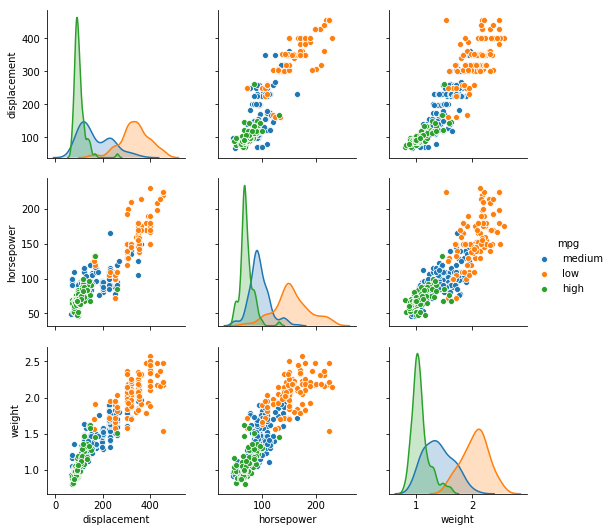

In [32]:
#visulaizing the dataframe
sns.pairplot(df,hue='mpg')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#splitting our data into test and training
X=df.drop('mpg',axis=1)
y=df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
#importing support vector machine model from scikit learn
from sklearn.svm import SVC

In [36]:
svc_model = SVC()

In [38]:
#fitting our model on training data
svc_model.fit(X_train,y_train)

C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
#predicting categories for test data
predictions=svc_model.predict(X_test)

In [40]:
#analyzing our findings
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(confusion_matrix(y_test,predictions))

[[11  0  9]
 [ 0 18 13]
 [ 4  0 63]]


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        high       0.73      0.55      0.63        20
         low       1.00      0.58      0.73        31
      medium       0.74      0.94      0.83        67

   micro avg       0.78      0.78      0.78       118
   macro avg       0.82      0.69      0.73       118
weighted avg       0.81      0.78      0.77       118

